In [1]:
%load_ext autoreload
%autoreload 2

from operaDB2 import OperaDB2
from omronEyeLib2 import OmronEye
from ttdcGlassLib2 import *
from imageLib2 import OperaImage
from sensorLib2 import *
import math
import numpy as np
import pandas as pd
import time

#Connection to opera DB
opera = OperaDB2('opera_conn.xml', 'meidai-opera-rds')
#cur.execute("select version()")
#print(cur.fetchall())


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


connect to opera2 server


In [2]:
#Get time from video
#desire_date = '2018-07-27'
#desire_date = '2018-08-22'
#desire_date = '2018-09-19'
desire_date = '2019-02-20'

#opera.get_TripListFromTime('2018-09-19', '00:00:00.0000', '23:59:59')
tripLists = opera.get_TripListFromTime(desire_date)
#print(tripLists)

dataLists = opera.get_DataListFromTrip( tripLists )
opera.viz_DataLists(dataLists)

SELECT * FROM data_logs WHERE log_date > '2019-02-20 00:00:00' AND log_date < '2019-02-20 23:59:59';
0 2019-02-20 14:15:23 : aioi
{'data_id': 45345, 'name': 'gpslog'}
gpslog 45345
{'data_id': 45351, 'name': 'picamera1', 'time': Timestamp('2019-02-20 14:16:02')}
picamera1 45351

1 2019-02-20 09:20:01 : meidai
{'data_id': 45364, 'name': 'gpslog'}
gpslog 45364
{'data_id': 45371, 'name': 'omron', 'time': Timestamp('2019-02-20 09:20:09')}
omron 45371
{'data_id': 45378, 'name': 'picamera1', 'time': Timestamp('2019-02-20 09:20:02')}
picamera1 45378
{'data_id': 45385, 'name': 'picamera2', 'time': Timestamp('2019-02-20 09:20:01')}
picamera2 45385
{'data_id': 45392, 'name': 'piglass', 'time': Timestamp('2019-02-20 09:20:00')}
piglass 45392

2 2019-02-20 10:14:02 : meidai
{'data_id': 45365, 'name': 'gpslog'}
gpslog 45365
{'data_id': 45372, 'name': 'omron', 'time': Timestamp('2019-02-20 10:14:08')}
omron 45372
{'data_id': 45379, 'name': 'picamera1', 'time': Timestamp('2019-02-20 10:14:01')}
picame

In [20]:
#Get heart rate data from opera DB
glassHr = TtdcGlassHr( opera )
column_names, df_hrs = glassHr.get_DataFromDataList(dataLists[3])
hr_ts = glassHr.get_TimeStamp(df_hrs)

{'name': 'piglass', 'data_id': 45394, 'time': Timestamp('2019-02-20 11:16:00')}
SELECT * FROM glass_hrs WHERE data_log_id = 45394;


In [33]:
#Get Glass data from opera DB
glass = TtdcGlass( opera )
column_names, df = glass.get_DataFromDataList(dataLists[3])

Sensor List: RedLEDRAW, InfraredRAW, GreenLED, Axis
Choice sensor in sensor list
RedLEDRAW
sensor = 'RedLEDRAW'
SELECT * FROM piglasses WHERE data_log_id = 45394 AND sensor = 'RedLEDRAW'  AND (serialtime DIV 10)%10 = 0 ;
InfraredRAW
sensor = 'InfraredRAW'
SELECT * FROM piglasses WHERE data_log_id = 45394 AND sensor = 'InfraredRAW'  AND (serialtime DIV 10)%10 = 0 ;
Axis
sensor = 'Axis'
SELECT * FROM piglasses WHERE data_log_id = 45394 AND sensor = 'Axis'  AND (serialtime DIV 10)%10 = 0 ;
Get timestamp
RedLEDRAW
InfraredRAW
Axis


In [50]:
#timestamp
print( 'Get timestamp')
gl_ts = {}
for sensor in glass.sensors:
    if( sensor != 'GreenLED'):
        print( sensor )
        gl_ts[sensor] = glass.get_TimeStamp(df[sensor])

#decode Axis data
ax, ay, az = glass.decode_AxisValue( df['Axis'] )
#print(df['Axis'])

Get timestamp
RedLEDRAW
InfraredRAW
Axis


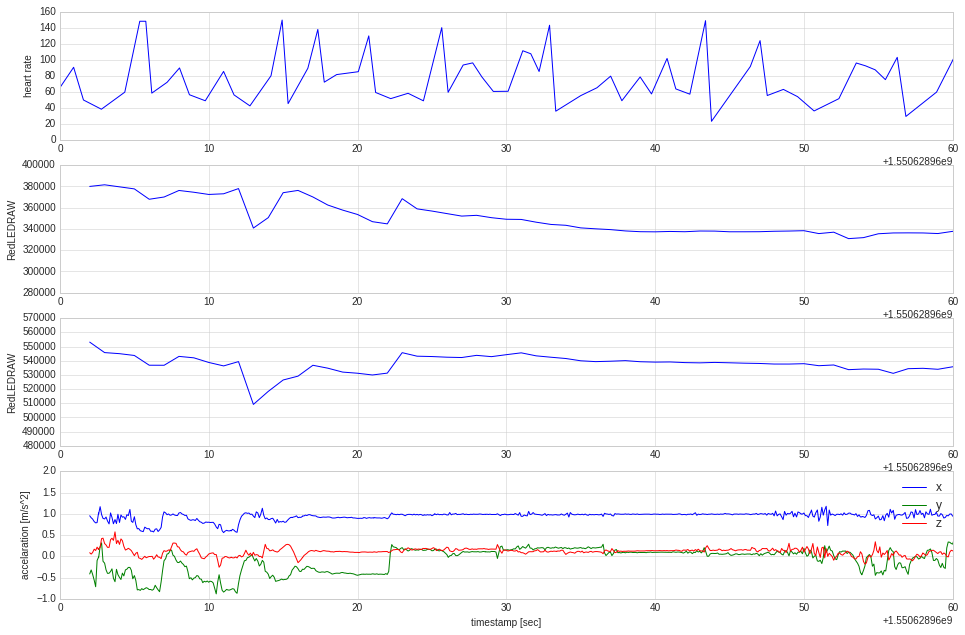

In [68]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# figure は 1 つ
plt.figure(figsize=(16, 16)) # figureの縦横の大きさ

plt.subplot(6,1,1) # figure内の枠の大きさとどこに配置している。subplot(行の数,列の数,何番目に配置しているか)
plt.plot(hr_ts, df_hrs['hr'])
plt.xlim([hr_ts[0],hr_ts[0]+60])
plt.ylabel('heart rate')
#plt.xlabel('timestamp [msec or usec]')

plt.subplot(6,1,2) # figure内の枠の大きさとどこに配置している。subplot(行の数,列の数,何番目に配置しているか)
plt.plot(gl_ts['RedLEDRAW'], df['RedLEDRAW']['value'].astype(float))
plt.xlim([hr_ts[0],hr_ts[0]+60])
plt.ylabel('RedLEDRAW')
#plt.xlabel('timestamp [msec or usec]')

plt.subplot(6,1,3) # figure内の枠の大きさとどこに配置している。subplot(行の数,列の数,何番目に配置しているか)
plt.plot(gl_ts['InfraredRAW'], df['InfraredRAW']['value'].astype(float))
plt.xlim([hr_ts[0],hr_ts[0]+60])
plt.ylabel('RedLEDRAW')
#plt.xlabel('timestamp [msec or usec]')

plt.subplot(6,1,4)
plt.plot(gl_ts['Axis'], ax, label='x')
plt.plot(gl_ts['Axis'], ay, label='y')
plt.plot(gl_ts['Axis'], az, label='z')
plt.ylabel('accelaration [m/s^2]')
plt.xlim([hr_ts[0],hr_ts[0]+60])
plt.legend(loc='upper right')
#plt.xlim([gl_ts['Axis'][0],gl_ts['Axis'][0]+100000*1000])

#plt.subplot(6,1,5)
#plt.plot(gl_ts['Axis'], ay)
#plt.ylabel('accelaration y [m/s^2]')
#plt.xlim([hr_ts[0],hr_ts[0]+60])
#plt.xlim([gl_ts['Axis'][0],gl_ts['Axis'][0]+100000*1000])

#plt.subplot(6,1,6)
#plt.plot(gl_ts['Axis'], az)
#plt.ylabel('accelaration z [m/s^2]')
#plt.xlim([hr_ts[0],hr_ts[0]+60])
#plt.xlim([gl_ts['Axis'][0],gl_ts['Axis'][0]+100000*1000])

plt.xlabel('timestamp [sec]')

plt.show()

In [28]:
# 以下はプログラムを残してます

In [12]:
#Get Omron Eye data
omron = OmronEye( opera )
column_names, df_omron = omron.get_DataFromLogID(179879)
    
print("column names : ")
print(column_names)
print('Read recoard len : ' + str(len(df_omron)))

SELECT * FROM omrons WHERE data_log_id = 179879;


KeyboardInterrupt: 

In [ ]:
#search sensor data
flagUsed=[]
for i in range(len(tripLists['sensor_name'])):
    flagUsed.append( 0 )

tripArray = []
for i in range(len(tripLists['sensor_name'])):
    if( flagUsed[i] == 1 ):
        continue
    
    trip = {}
    #calc timestamp
    JST = timezone(timedelta(hours=+9), 'JST')
    start_date = pd.Timestamp(tripLists['log_date'][i].replace(tzinfo=JST))
  
    #Set
    trip['time'] = tripLists['log_date'][i]
    trip['oc_id'] = tripLists['oc_id'][i]
    trip['start_timestamp'] = start_date.timestamp()
    
    sensor = {}
    sensor['name'] = tripLists['sensor_name'][i]
    sensor['data_id'] = tripLists['id'][i]
    flagUsed[i] = 1
    
    sensorArray = []
    sensorArray.append(sensor)
    for i in range(i+1, len(tripLists['sensor_name'])):
        start_date = pd.Timestamp(tripLists['log_date'][i].replace(tzinfo=JST))
        sensor = {}
        if( trip['start_timestamp'] - 5*60 < start_date.timestamp() and start_date.timestamp() < trip['start_timestamp'] + 5*60 ):
            #check multiple
            for s in sensorArray:
                if( s['name'] == tripLists['sensor_name'][i]):
                    print('Warning: Already find same sonser :' + str( tripLists['sensor_name'][i] ))
                    break
                    
            sensor['name'] = tripLists['sensor_name'][i]
            sensor['data_id'] = tripLists['id'][i]
            
            sensorArray.append(sensor)
            flagUsed[i] = 1
            
    trip['sensor'] = sensorArray
    tripArray.append( trip )

#print
id=0
for ta in tripArray:
    print( str(id) + ' ' + str(ta['time']) + ' : '  + str(ta['oc_id']))
    for sensor in ta['sensor']:
        print( str( sensor['name'] ) + ' ' + str( sensor['data_id']) )
    print()
    id=id+1

for i in range(len(tripLists['sensor_name'])):
    if( flagUsed[i] == 0 ):
        print( ' Warning : Not used ' + str(tripLists['sensor_name'][i]))

In [ ]:
#Get summary
tripArray = []
for i in range(len(tripLists['sensor_name'])):
    trip = {}
    if(tripLists['sensor_name'][i] == 'gpslog'):
        trip['time'] = tripLists['log_date'][i]
        trip['oc_id'] = tripLists['oc_id'][i]
                
        #calc timestamp
        JST = timezone(timedelta(hours=+9), 'JST')
        start_date = pd.Timestamp(tripLists['log_date'][i].replace(tzinfo=JST))
        trip['start_timestamp'] = start_date.timestamp()
        
        tripArray.append(trip)

#search sensor data
flagUsed=[]
for i in range(len(tripLists['sensor_name'])):
    flagUsed.append( 0 )
    
for ta in tripArray:
    sensorArray = []
    for i in range(len(tripLists['sensor_name'])):
        #calc timestamp
        JST = timezone(timedelta(hours=+9), 'JST')
        start_date = pd.Timestamp(tripLists['log_date'][i].replace(tzinfo=JST))
  
        sensor = {}
        if( ta['start_timestamp'] - 5*60 < start_date.timestamp() and start_date.timestamp() < ta['start_timestamp'] + 5*60 ):
            #check multiple
            for s in sensorArray:
                if( s['name'] == tripLists['sensor_name'][i]):
                    print('Warning: Already find same sonser :' + str( tripLists['sensor_name'][i] ))
                    break
                    
            sensor['name'] = tripLists['sensor_name'][i]
            sensor['data_id'] = tripLists['id'][i]
            
            sensorArray.append(sensor)
            flagUsed[i] = 1
        
    ta['sensor'] = sensorArray
        
#print
id=0
for ta in tripArray:
    print( str(id) + ' ' + str(ta['time']) + ' : '  + str(ta['oc_id']))
    for sensor in ta['sensor']:
        print( str( sensor['name'] ) + ' ' + str( sensor['data_id']) )
    print()
    id=id+1

for i in range(len(tripLists['sensor_name'])):
    print( flagUsed[i] )
    if( flagUsed[i] == 0 ):
        print( ' Warning : Not used ' + str(tripLists['sensor_name'][i]))